In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import joblib
import pickle
import xgboost as xgb


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [26]:
def error_threshold(predict_vector, test_label, error_tolerance):
    #Función para obtener vectores predichos con cierta cantidad de errores

    error = []
    error_vector = []

    for i,j in zip(predict_vector, test_label):
        if (i != j).any():
            error.append([i,j])

        if list(i == j).count(False) == error_tolerance:
            error_vector.append([i, j])
    
    return error, error_vector

In [11]:
# Load data using pickle

with open('data/variables.pkl', 'rb') as f:
    data = pickle.load(f)

normalized_vector = data[0]
label = data[1]

### Preparing train data

In [35]:
# Create train and test data
x_train, x_test, y_train, y_test = train_test_split(normalized_vector, label, test_size=0.3, random_state=0)

# Flatten the data
x_train_flat = np.array([np.concatenate(x) for x in x_train])
x_test_flat = np.array([np.concatenate(x) for x in x_test])

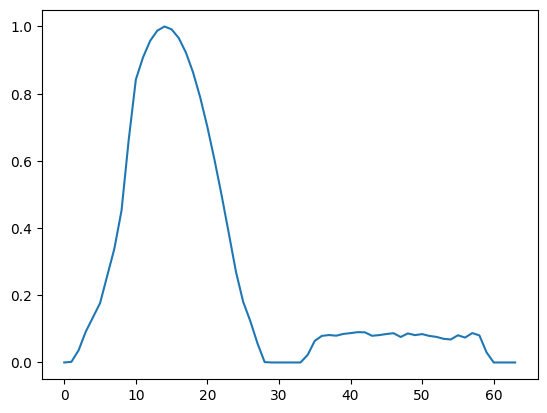

In [36]:
plt.plot(x_train_flat[4])

How it looks data

Text(0.5, 1.0, 'Flattened Data')

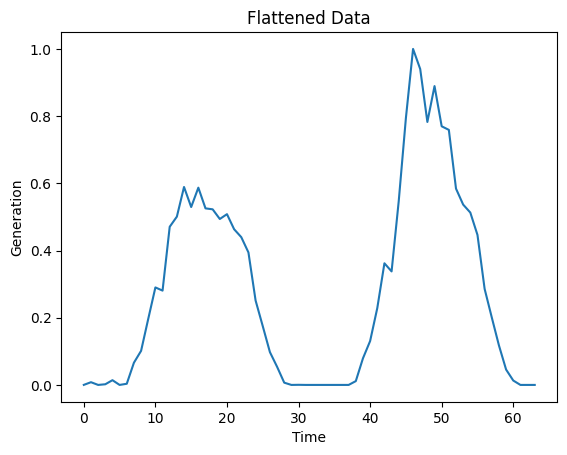

In [33]:
plt.plot(x_train_flat[10])
plt.xlabel('Time')
plt.ylabel('Generation')
plt.title('Flattened Data')


## Training XGBoost

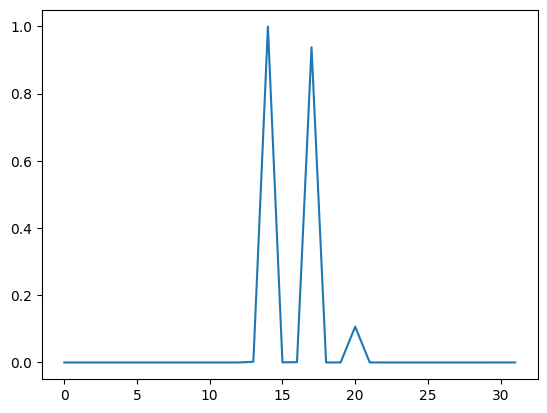

In [37]:
# Crear un objeto DMatrix para los datos de entrenamiento
dtrain = xgb.DMatrix(data = x_train_flat, label = y_train)

# Definir parámetros del modelo
params = {
    "objective": "binary:logistic", 
    "learning_rate": 0.3
}

# Entrenar el modelo
model = xgb.train(params, dtrain, 1000)

dtest = xgb.DMatrix(data = x_test_flat)

# Realizar predicciones
y_pred_prob = model.predict(dtest)

plt.plot(y_pred_prob[100])

0.5383838383838384


Text(0.5, 1.0, 'Precisión vs Umbral de error')

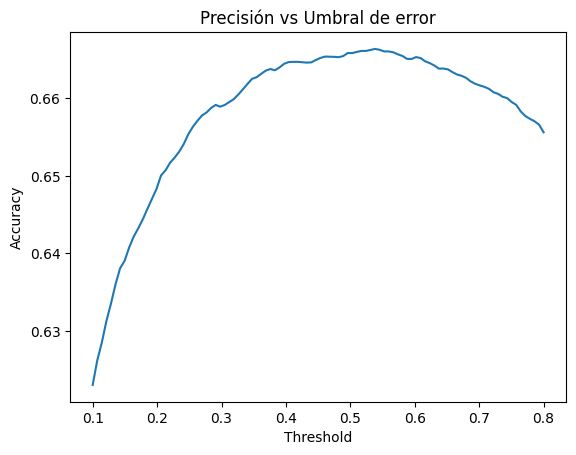

In [38]:
ummbral = np.linspace(0.1, 0.8, 100)
AC = []
for i in ummbral:
    y_pred = np.where(y_pred_prob >= i, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    AC.append(accuracy)

idx_max = AC.index(max(AC))
print(ummbral[idx_max])

plt.plot(ummbral, AC)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Precisión vs Umbral de error")

In [39]:
import numpy as np
# Umbral de decisión
threshold = ummbral[idx_max]

# Convertir probabilidades a etiquetas binarias
y_pred = np.where(y_pred_prob >= threshold, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6663751639702667


In [27]:
print("")

prediccion = y_pred
lista1 = error_threshold(prediccion, y_test, 1)
lista2 = error_threshold(prediccion, y_test, 2)
lista3 = error_threshold(prediccion, y_test, 3)
lista4 = error_threshold(prediccion, y_test, 4)
pre = accuracy_score(prediccion, y_test)

print("total de predicciones:", len(x_test))
print("Total de vector con 1 error:", len(lista1[1]))
print("Total de vector con 2 error:", len(lista2[1]))
print("Total de vector con 3 error:", len(lista3[1]))
print("Total de vector con 4 error:", len(lista4[1]))

print("")

print("Precision con 1 error:", (len(lista1[1]) + pre*len(x_test))/len(x_test))
print("Precision con 2 error:", (len(lista1[1]) + len(lista2[1]) + pre*len(x_test))/len(x_test))
print("Precision con 3 error:", (len(lista1[1]) + len(lista2[1]) + len(lista3[1]) + pre*len(x_test))/len(x_test))
print("Precision con 4 error:", (len(lista1[1]) + len(lista2[1]) + len(lista3[1]) + len(lista4[1]) + pre*len(x_test))/len(x_test))

error1 = (len(lista1[1]) + pre*len(x_test))/len(x_test)
error2 = (len(lista1[1]) + len(lista2[1]) + pre*len(x_test))/len(x_test)
error3 = (len(lista1[1]) + len(lista2[1]) + len(lista3[1]) + pre*len(x_test))/len(x_test)
error4 = (len(lista1[1]) + len(lista2[1]) + len(lista3[1]) + len(lista4[1]) + pre*len(x_test))/len(x_test)


total de predicciones: 61749
Total de vector con 1 error: 14003
Total de vector con 2 error: 5856
Total de vector con 3 error: 2376
Total de vector con 4 error: 1620

Precision con 1 error: 0.7883690424136424
Precision con 2 error: 0.88320458630909
Precision con 3 error: 0.9216829422338824
Precision con 4 error: 0.9479181849098771
